# House Price Prediction with Linear Regression

![](https://i.imgur.com/3sw1fY9.jpg)

In this assignment, you're going to predict the price of a house using information like its location, area, no. of rooms etc. You'll use the dataset from the [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition on [Kaggle](https://kaggle.com). We'll follow a step-by-step process to train our model:

1. Download and explore the data
2. Prepare the dataset for training
3. Train a linear regression model
4. Make predictions and evaluate the model

As you go through this notebook, you will find a **???** in certain places. Your job is to replace the **???** with appropriate code or values, to ensure that the notebook runs properly end-to-end and your machine learning model is trained properly without errors. 

**Guidelines**

1. Make sure to run all the code cells in order. Otherwise, you may get errors like `NameError` for undefined variables.
2. Do not change variable names, delete cells, or disturb other existing code. It may cause problems during evaluation.
3. In some cases, you may need to add some code cells or new statements before or after the line of code containing the **???**. 
4. Since you'll be using a temporary online service for code execution, save your work by running `jovian.commit` at regular intervals.
5. Review the "Evaluation Criteria" for the assignment carefully and make sure your submission meets all the criteria.
6. Questions marked **(Optional)** will not be considered for evaluation and can be skipped. They are for your learning.
7. It's okay to ask for help & discuss ideas on the [community forum](https://jovian.ai/forum/c/zero-to-gbms/gbms-assignment-1/100), but please don't post full working code, to give everyone an opportunity to solve the assignment on their own.


**Important Links**:

- Make a submission here: https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/assignment-1-train-your-first-ml-model
- Ask questions, discuss ideas and get help here: https://jovian.ai/forum/c/zero-to-gbms/gbms-assignment-1/100
- Review the following notebooks:
    - https://jovian.ai/aakashns/python-sklearn-linear-regression
    - https://jovian.ai/aakashns/python-sklearn-logistic-regression





## How to Run the Code and Save Your Work


**Option 1: Running using free online resources (1-click, recommended):** The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Binder**. This will set up a cloud-based Jupyter notebook server and allow you to modify/execute the code.


**Option 2: Running on your computer locally:** To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.

**Saving your work**: You can save a snapshot of the assignment to your [Jovian](https://jovian.ai) profile, so that you can access it later and continue your work. Keep saving your work by running `jovian.commit` from time to time.

In [1]:
!pip install jovian scikit-learn --upgrade --quiet

In [2]:
import jovian

In [3]:
jovian.commit(project='python-sklearn-assignment', privacy='secret')

<IPython.core.display.Javascript object>

[jovian] Creating a new project "ikaushikpal/python-sklearn-assignment"
[jovian] Committed successfully! https://jovian.ai/ikaushikpal/python-sklearn-assignment


'https://jovian.ai/ikaushikpal/python-sklearn-assignment'

Let's begin by installing the required libraries:

In [ ]:
!pip install numpy pandas matplotlib seaborn plotly opendatasets jovian --quiet

## Step 1 - Download and Explore the Data

The dataset is available as a ZIP file at the following url:

In [4]:
dataset_url = 'https://github.com/JovianML/opendatasets/raw/master/data/house-prices-advanced-regression-techniques.zip'

We'll use the `urlretrieve` function from the module [`urllib.request`](https://docs.python.org/3/library/urllib.request.html) to dowload the dataset.

In [5]:
from urllib.request import urlretrieve

In [6]:
urlretrieve(dataset_url, 'house-prices.zip')

('house-prices.zip', <http.client.HTTPMessage at 0x2c9a33ddfa0>)

The file `housing-prices.zip` has been downloaded. Let's unzip it using the [`zipfile`](https://docs.python.org/3/library/zipfile.html) module.

In [7]:
from zipfile import ZipFile

In [8]:
with ZipFile('house-prices.zip') as f:
    f.extractall(path='house-prices')

The dataset is extracted to the folder `house-prices`. Let's view the contents of the folder using the [`os`](https://docs.python.org/3/library/os.html) module.

In [9]:
import os

In [10]:
data_dir = 'house-prices'

In [11]:
os.listdir(data_dir)

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

Use the "File" > "Open" menu option to browse the contents of each file. You can also check out the [dataset description](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) on Kaggle to learn more.

We'll use the data in the file `train.csv` for training our model. We can load the for processing using the [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html) library.

In [12]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

In [13]:
train_csv_path = data_dir + '/train.csv'
train_csv_path

'house-prices/train.csv'

> **QUESTION 1**: Load the data from the file `train.csv` into a Pandas data frame.

In [14]:
prices_df = pd.read_csv(train_csv_path)

In [17]:
prices_df.drop(columns=['Id'], axis='columns', inplace=True)
prices_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,

Let's explore the columns and data types within the dataset.

In [18]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

> **QUESTION 2**: How many rows and columns does the dataset contain? 

In [19]:
n_rows = prices_df.shape[0]

In [20]:
n_cols = prices_df.shape[1]

In [21]:
print('The dataset contains {} rows and {} columns.'.format(n_rows, n_cols))

The dataset contains 1460 rows and 80 columns.


> **(OPTIONAL) QUESTION**: Before training the model, you may want to explore and visualize data from the various columns within the dataset, and study their relationship with the price of the house (using scatter plot and correlations). Create some graphs and summarize your insights using the empty cells below.

In [28]:
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
%matplotlib inline

In [40]:
corr_res = prices_df.corr().iloc[:, -1]

for col in corr_res.index:
    val = corr_res[col]
    if abs(val) >= 0.5:
        print(f"{col}\t{val}")

OverallQual	0.7909816005838053
YearBuilt	0.5228973328794967
YearRemodAdd	0.5071009671113866
TotalBsmtSF	0.6135805515591943
1stFlrSF	0.6058521846919153
GrLivArea	0.7086244776126515
FullBath	0.5606637627484453
TotRmsAbvGrd	0.5337231555820284
GarageCars	0.6404091972583519
GarageArea	0.6234314389183622
SalePrice	1.0


In [39]:
corr_res.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

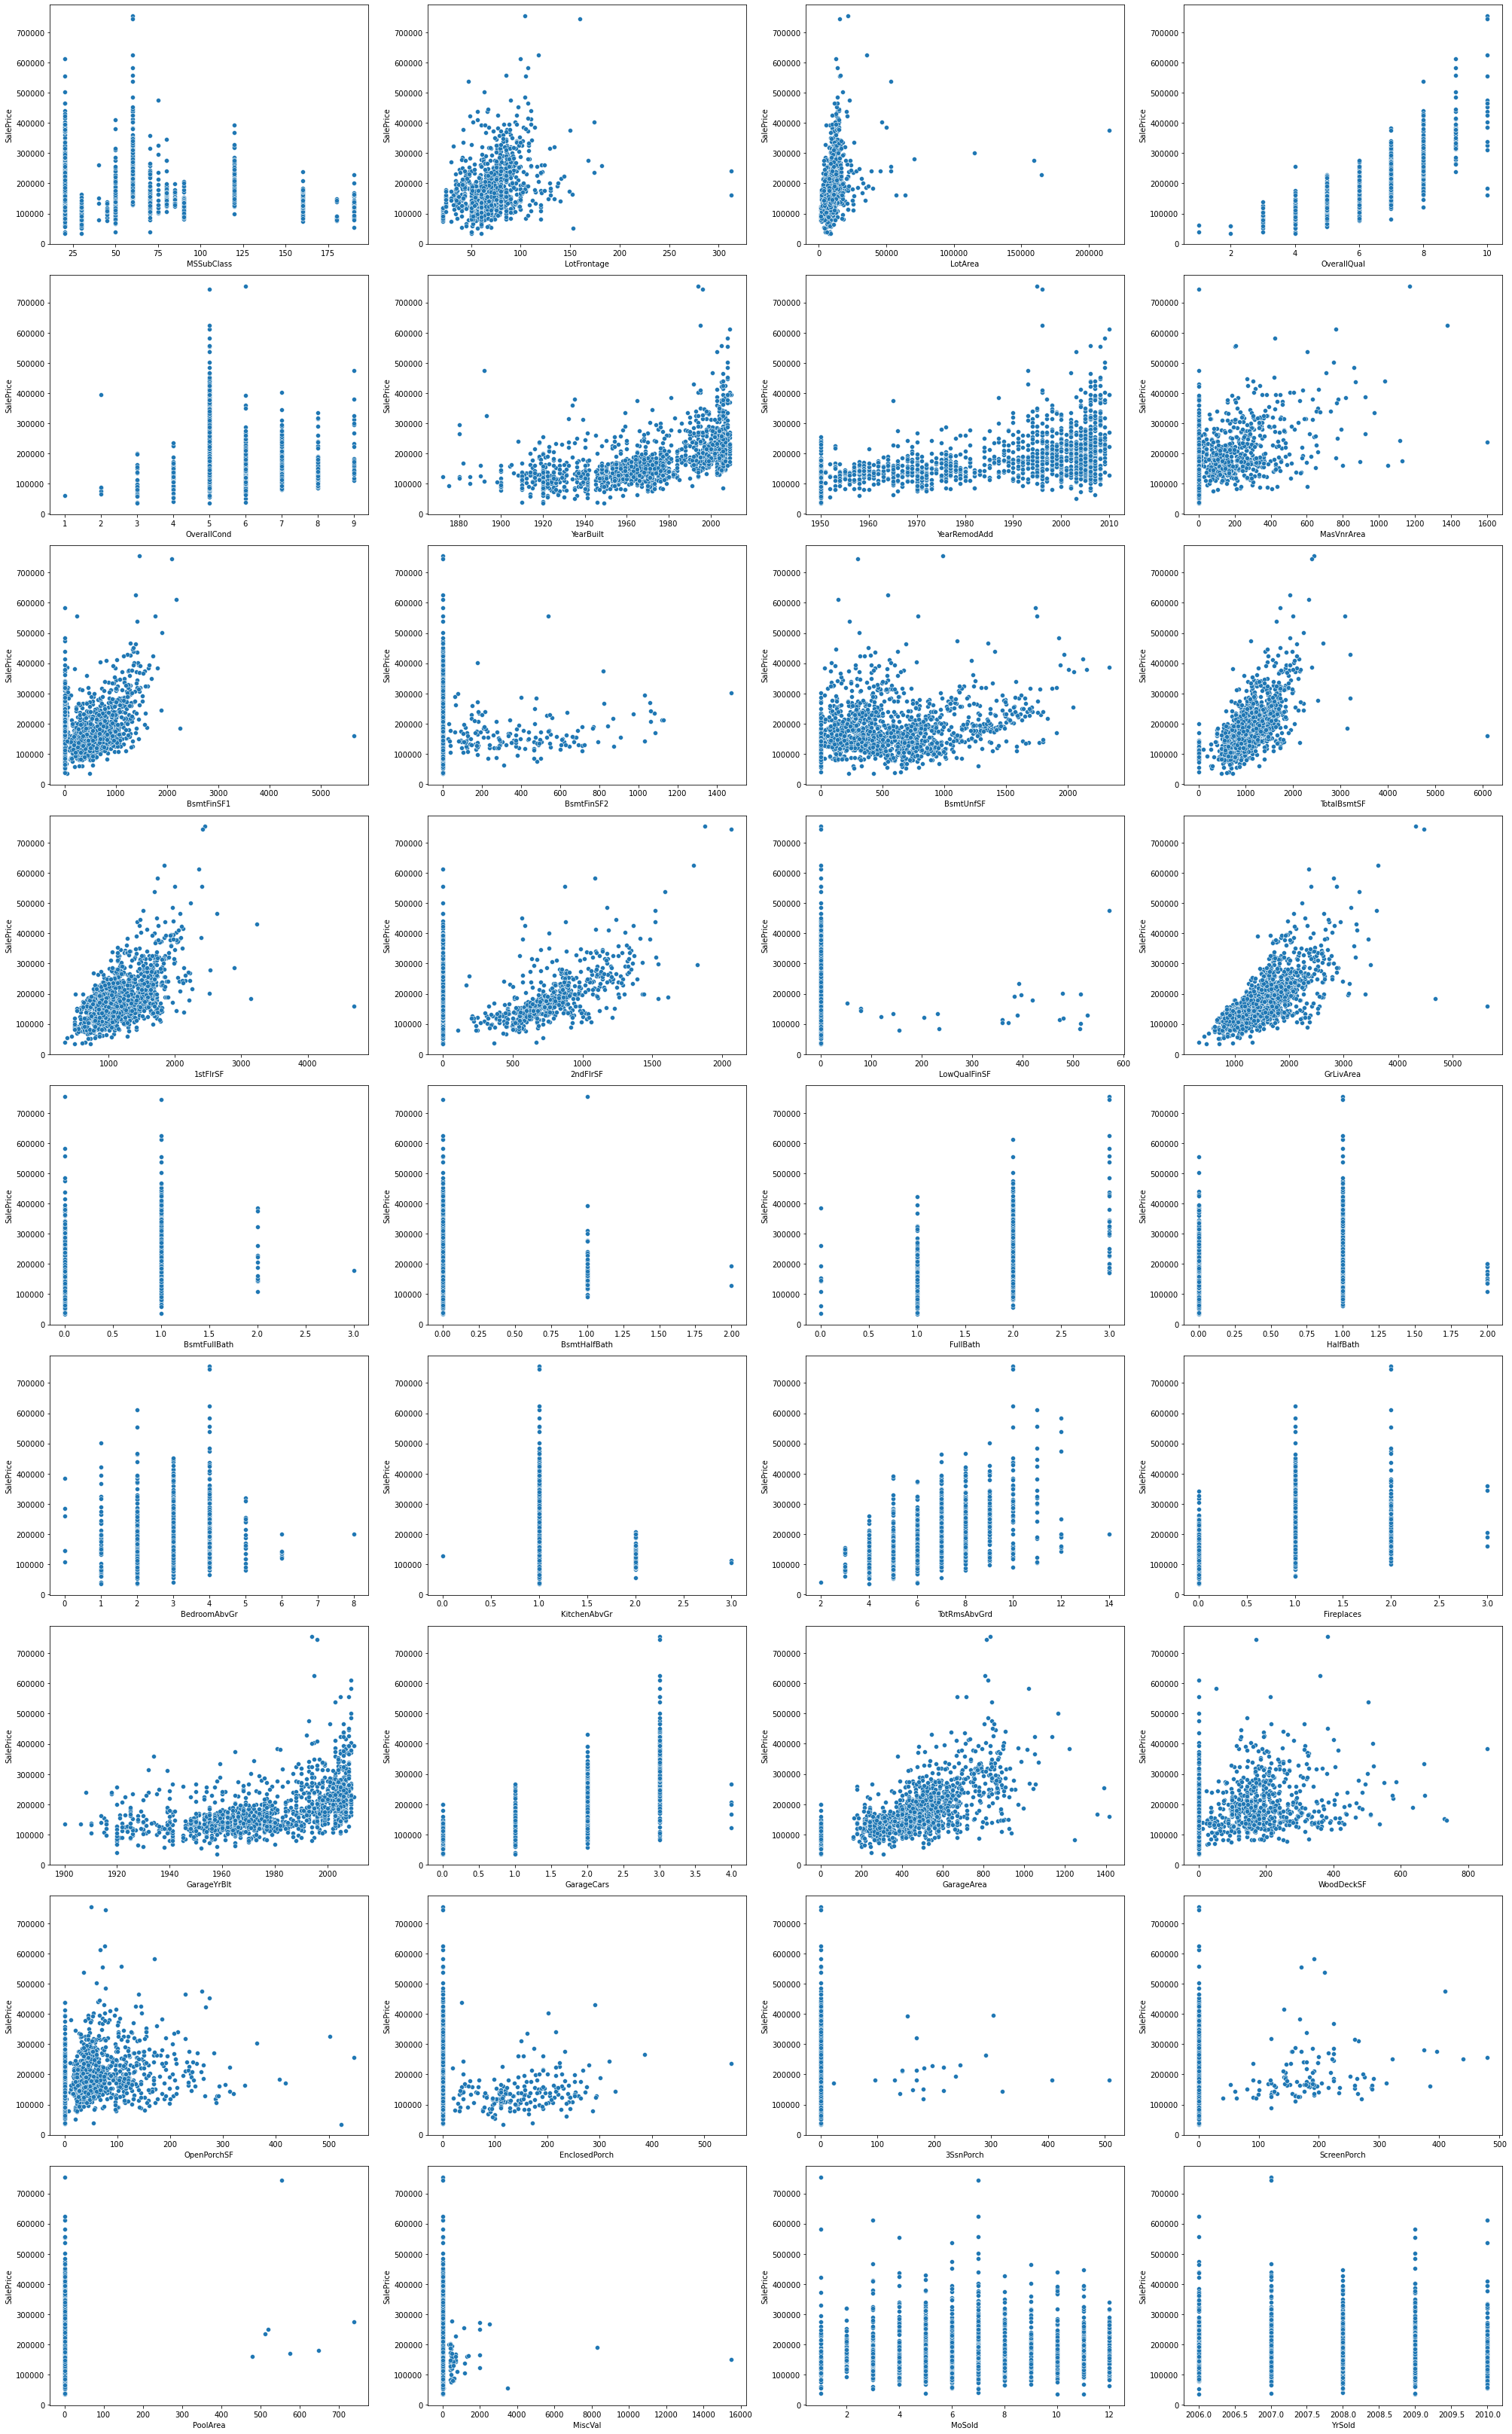

In [52]:
n = len(corr_res.index[:-1])
counter = 1

j_range = 4
i_range = n//j_range

fig, axes = plt.subplots(i_range, j_range, figsize=(28, 45))

for i in range(i_range):
    for j in range(j_range):
        index = (i*j_range) + j
        col = corr_res.index[index]
        
        sns.scatterplot(ax=axes[i, j], data=prices_df, x=col, y='SalePrice')
        
fig.tight_layout(h_pad=1,w_pad=1)

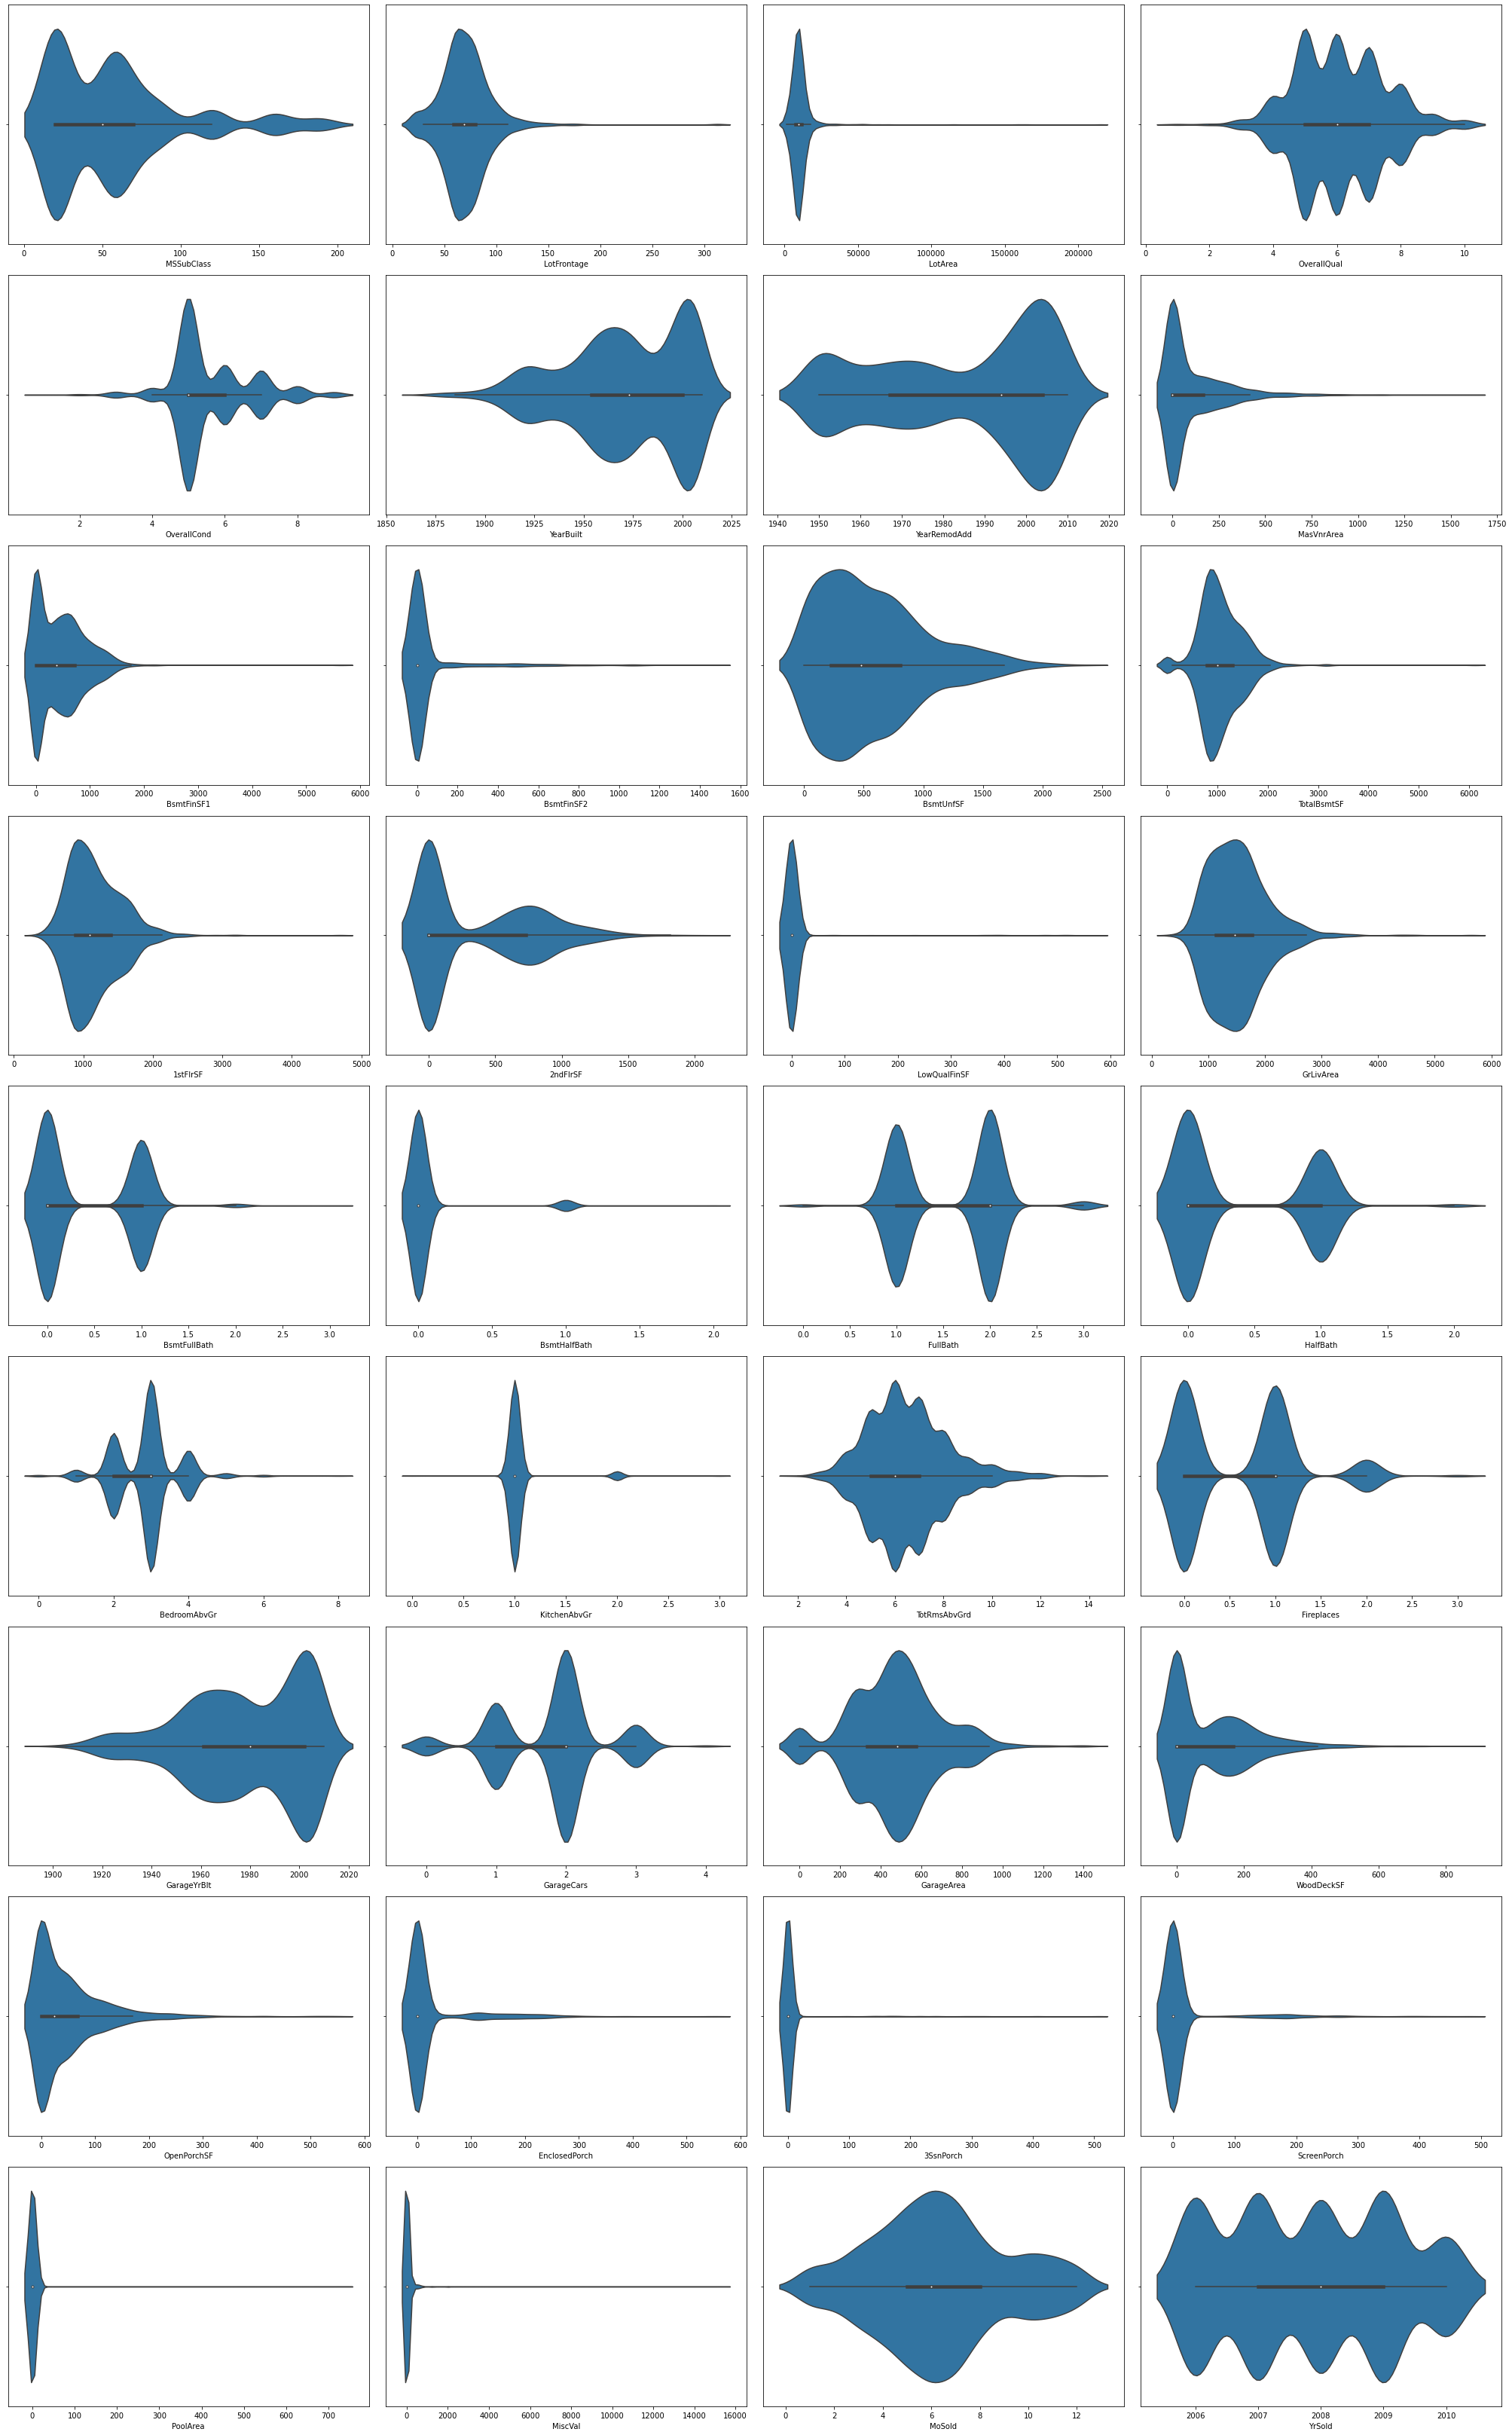

In [54]:
n = len(corr_res.index[:-1])
counter = 1

j_range = 4
i_range = n//j_range

fig, axes = plt.subplots(i_range, j_range, figsize=(28, 45))

for i in range(i_range):
    for j in range(j_range):
        index = (i*j_range) + j
        col = corr_res.index[index]
        
        sns.violinplot(ax=axes[i, j], data=prices_df, x=col)
        
fig.tight_layout(h_pad=1,w_pad=1)

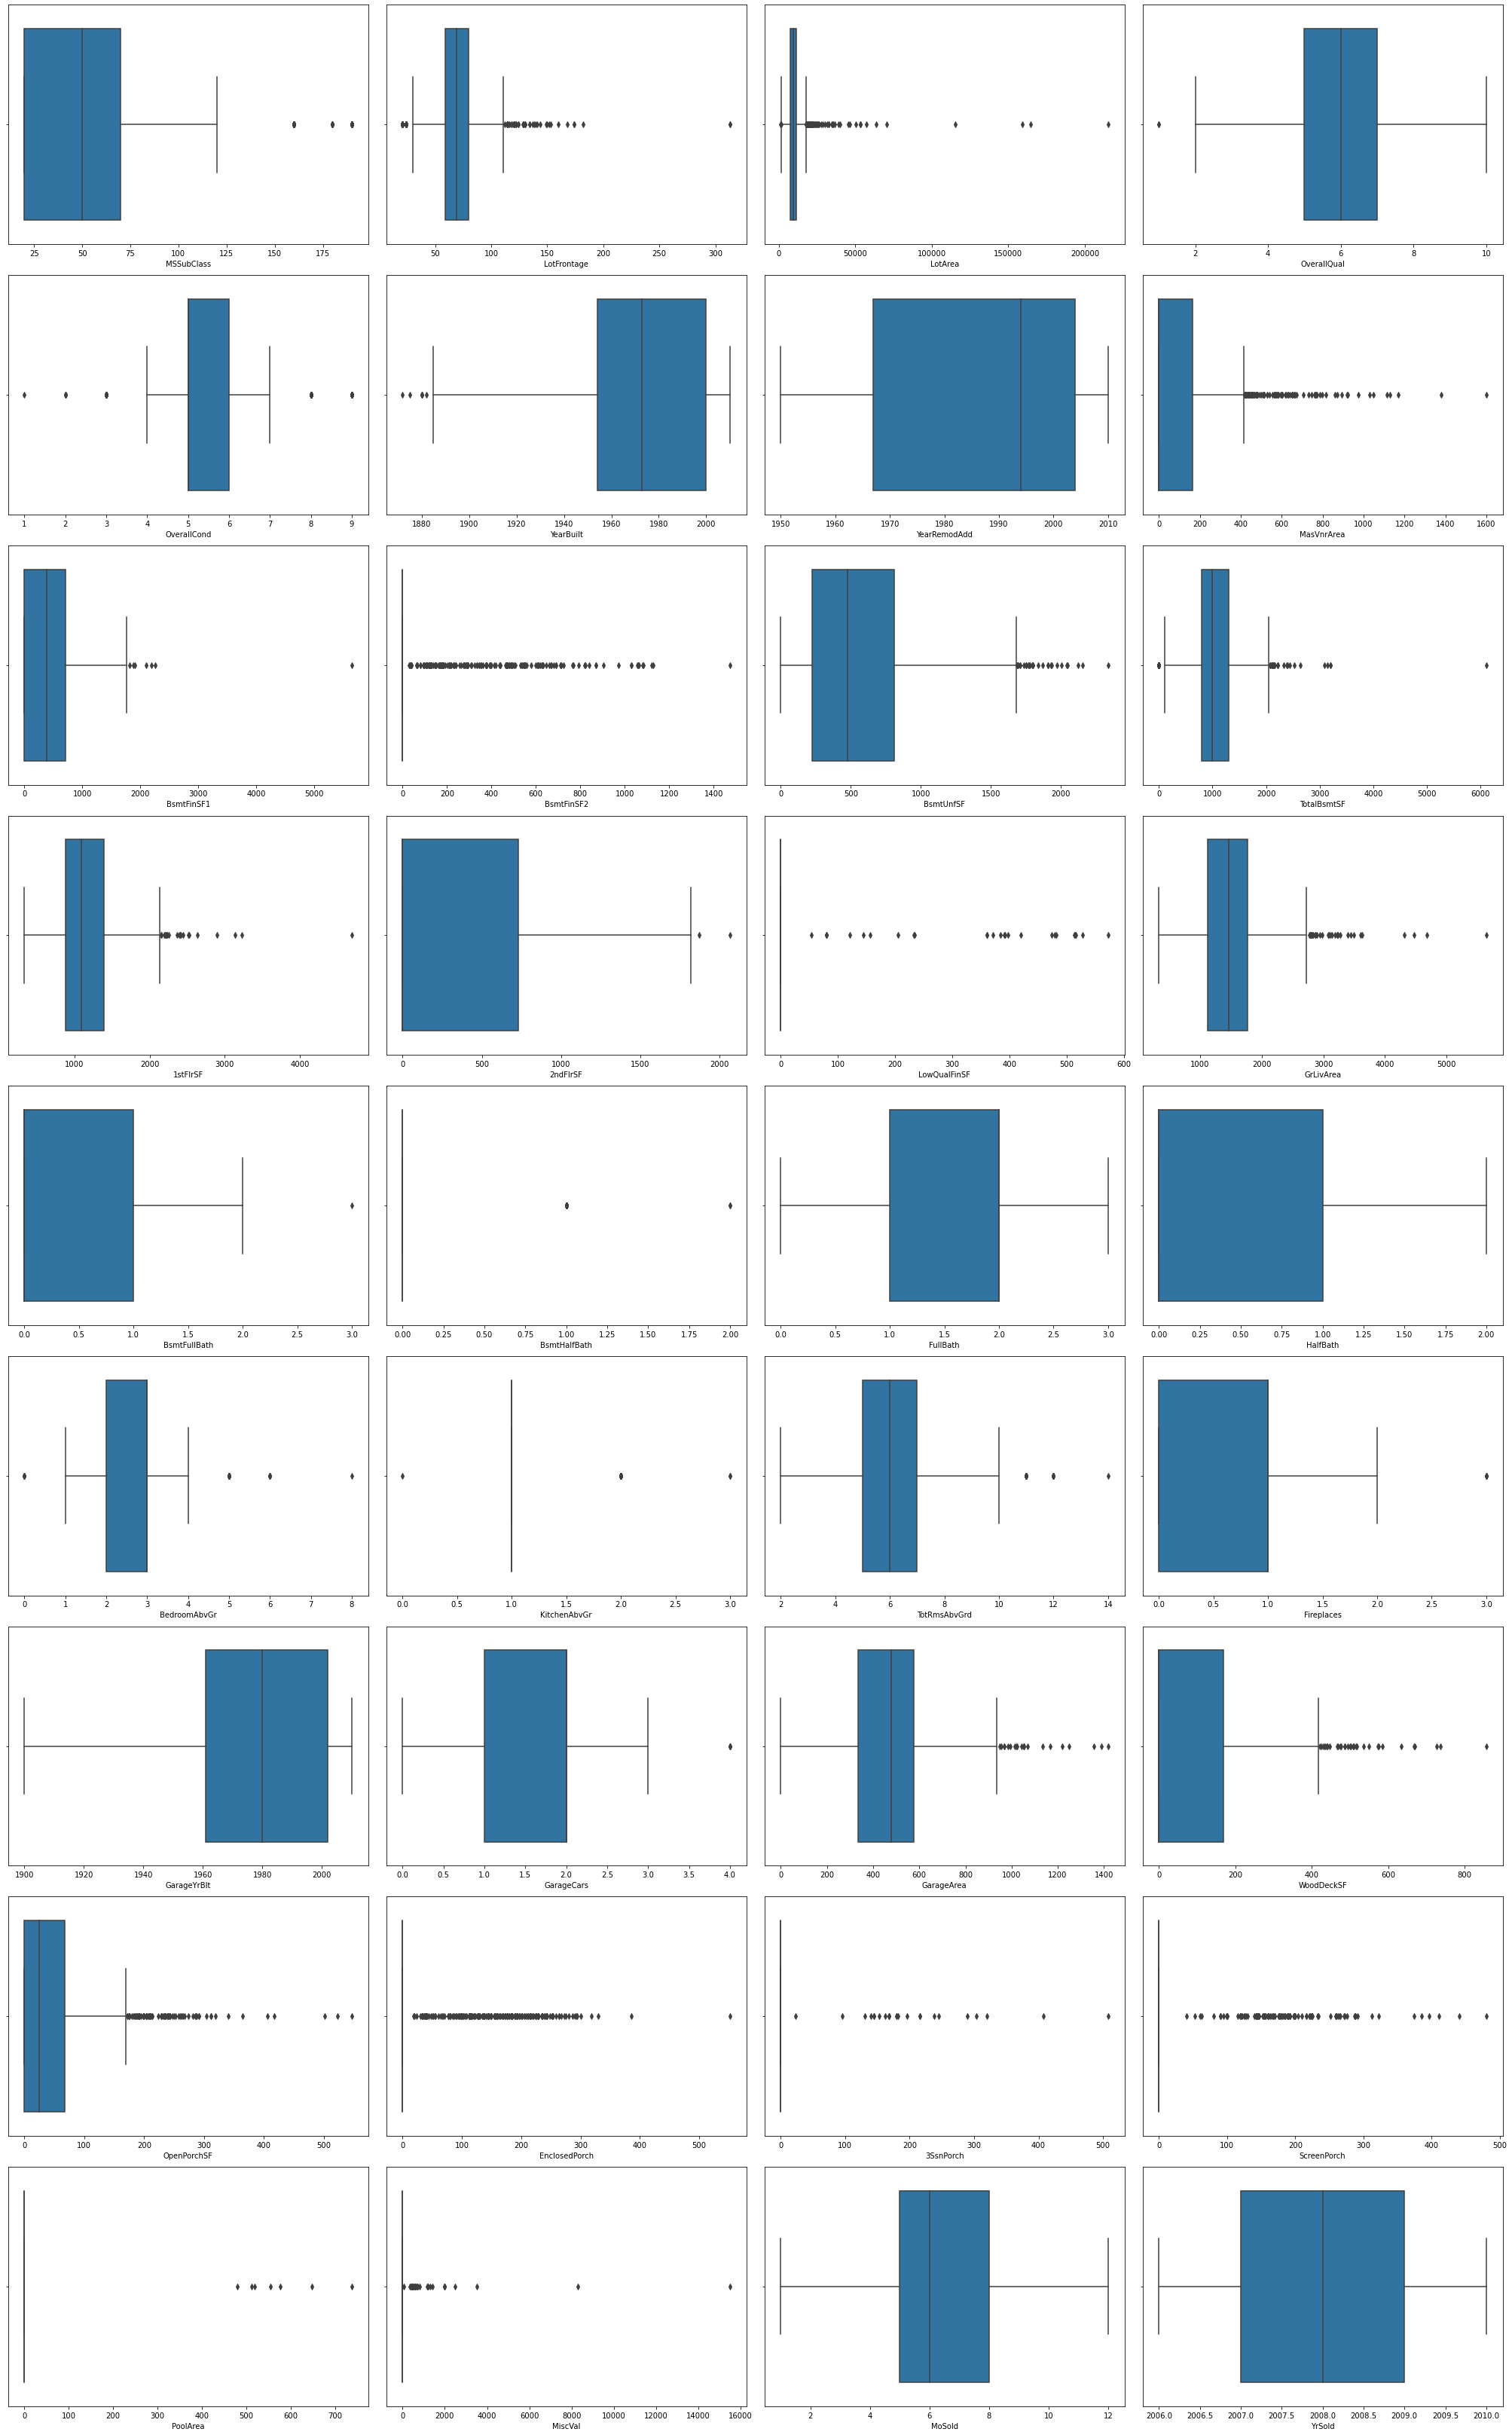

In [55]:
n = len(corr_res.index[:-1])
counter = 1

j_range = 4
i_range = n//j_range

fig, axes = plt.subplots(i_range, j_range, figsize=(28, 45))

for i in range(i_range):
    for j in range(j_range):
        index = (i*j_range) + j
        col = corr_res.index[index]
        
        sns.boxplot(ax=axes[i, j], data=prices_df, x=col)
        
fig.tight_layout(h_pad=1,w_pad=1)

Let's save our work before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

## Step 2 - Prepare the Dataset for Training

Before we can train the model, we need to prepare the dataset. Here are the steps we'll follow:

1. Identify the input and target column(s) for training the model.
2. Identify numeric and categorical input columns.
3. [Impute](https://scikit-learn.org/stable/modules/impute.html) (fill) missing values in numeric columns
4. [Scale](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) values in numeric columns to a $(0,1)$ range.
5. [Encode](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) categorical data into one-hot vectors.
6. Split the dataset into training and validation sets.


### Identify Inputs and Targets

While the dataset contains 81 columns, not all of them are useful for modeling. Note the following:

- The first column `Id` is a unique ID for each house and isn't useful for training the model.
- The last column `SalePrice` contains the value we need to predict i.e. it's the target column.
- Data from all the other columns (except the first and the last column) can be used as inputs to the model.
 

In [ ]:
prices_df

> **QUESTION 3**: Create a list `input_cols` of column names containing data that can be used as input to train the model, and identify the target column as the variable `target_col`.

In [ ]:
# Identify the input columns (a list of column names)
input_cols = [???]

In [ ]:
# Identify the name of the target column (a single string, not a list)
target_col = ???

In [ ]:
print(list(input_cols))

In [ ]:
len(input_cols)

In [ ]:
print(target_col)

Make sure that the `Id` and `SalePrice` columns are not included in `input_cols`.

Now that we've identified the input and target columns, we can separate input & target data.

In [ ]:
inputs_df = prices_df[input_cols].copy()

In [ ]:
targets = prices_df[target_col]

In [ ]:
inputs_df

In [ ]:
targets

Let's save our work before continuing.

In [ ]:
jovian.commit()

### Identify Numeric and Categorical Data

The next step in data preparation is to identify numeric and categorical columns. We can do this by looking at the data type of each column.

In [ ]:
prices_df.info()

> **QUESTION 4**: Crate two lists `numeric_cols` and `categorical_cols` containing names of numeric and categorical input columns within the dataframe respectively. Numeric columns have data types `int64` and `float64`, whereas categorical columns have the data type `object`.
>
> *Hint*: See this [StackOverflow question](https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas). 

In [ ]:
import numpy as np

In [ ]:
numeric_cols = inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
categorical_cols = ???

In [ ]:
print(list(numeric_cols))

In [ ]:
print(list(categorical_cols))

Let's save our work before continuing.

In [ ]:
jovian.commit()

### Impute Numerical Data

Some of the numeric columns in our dataset contain missing values (`nan`).

In [ ]:
missing_counts = inputs_df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

Machine learning models can't work with missing data. The process of filling missing values is called [imputation](https://scikit-learn.org/stable/modules/impute.html).

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.


In [ ]:
from sklearn.impute import SimpleImputer

> **QUESTION 5**: Impute (fill) missing values in the numeric columns of `inputs_df` using a `SimpleImputer`. 
>
> *Hint*: See [this notebook](https://jovian.ai/aakashns/python-sklearn-logistic-regression/v/66#C88).

In [ ]:
# 1. Create the imputer
imputer = ???

In [ ]:
# 2. Fit the imputer to the numeric colums
???

In [ ]:
# 3. Transform and replace the numeric columns
inputs_df[numeric_cols] = ???

After imputation, none of the numeric columns should contain any missing values.

In [ ]:
missing_counts = inputs_df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0] # should be an empty list

Let's save our work before continuing.

In [ ]:
jovian.commit()

### Scale Numerical Values

The numeric columns in our dataset have varying ranges. 

In [ ]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

A good practice is to [scale numeric features](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) to a small range of values e.g. $(0,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.


> **QUESTION 6**: Scale numeric values to the $(0, 1)$ range using `MinMaxScaler` from `sklearn.preprocessing`.
>
> *Hint*: See [this notebook](https://jovian.ai/aakashns/python-sklearn-logistic-regression/v/66#C104).

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Create the scaler
scaler = ???

In [ ]:
# Fit the scaler to the numeric columns
???

In [ ]:
# Transform and replace the numeric columns
inputs_df[numeric_cols] = ???

After scaling, the ranges of all numeric columns should be $(0, 1)$.

In [ ]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

Let's save our work before continuing.

In [ ]:
jovian.commit()

### Encode Categorical Columns

Our dataset contains several categorical columns, each with a different number of categories.

In [ ]:
inputs_df[categorical_cols].nunique().sort_values(ascending=False)



Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

> **QUESTION 7**: Encode categorical columns in the dataset as one-hot vectors using `OneHotEncoder` from `sklearn.preprocessing`. Add a new binary (0/1) column for each category
> 
> *Hint*: See [this notebook](https://jovian.ai/aakashns/python-sklearn-logistic-regression/v/66#C122).

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# 1. Create the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
# 2. Fit the encoder to the categorical colums
???

In [ ]:
# 3. Generate column names for each category
encoded_cols = list(encoder.get_feature_names(categorical_cols))
len(encoded_cols)

In [ ]:
# 4. Transform and add new one-hot category columns
inputs_df[encoded_cols] = ???

The new one-hot category columns should now be added to `inputs_df`.

In [ ]:
inputs_df

Let's save our work before continuing.

In [ ]:
jovian.commit()

### Training and Validation Set

Finally, let's split the dataset into a training and validation set. We'll use a randomly select 25% subset of the data for validation. Also, we'll use just the numeric and encoded columns, since the inputs to our model must be numbers. 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs_df[numeric_cols + encoded_cols], 
                                                                        targets, 
                                                                        test_size=0.25, 
                                                                        random_state=42)

In [ ]:
train_inputs

In [ ]:
train_targets

In [ ]:
val_inputs

In [ ]:
val_targets

Let's save our work before continuing.

In [ ]:
jovian.commit()

## Step 3 - Train a Linear Regression Model

We're now ready to train the model. Linear regression is a commonly used technique for solving [regression problems](https://jovian.ai/aakashns/python-sklearn-logistic-regression/v/66#C6). In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).


Here's a visual summary of how a linear regression model is structured:

<img src="https://i.imgur.com/iTM2s5k.png" width="480">

However, linear regression doesn't generalize very well when we have a large number of input columns with co-linearity i.e. when the values one column are highly correlated with values in other column(s). This is because it tries to fit the training data perfectly. 

Instead, we'll use Ridge Regression, a variant of linear regression that uses a technique called L2 regularization to introduce another loss term that forces the model to generalize better. Learn more about ridge regression here: https://www.youtube.com/watch?v=Q81RR3yKn30

> **QUESTION 8**: Create and train a linear regression model using the `Ridge` class from `sklearn.linear_model`.

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Create the model
model = ???

In [ ]:
# Fit the model using inputs and targets
???

`model.fit` uses the following strategy for training the model (source):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

Let's save our work before continuing.

In [ ]:
jovian.commit()

## Step 4 - Make Predictions and Evaluate Your Model

The model is now trained, and we can use it to generate predictions for the training and validation inputs. We can evaluate the model's performance using the RMSE (root mean squared error) loss function.

> **QUESTION 9**: Generate predictions and compute the RMSE loss for the training and validation sets. 
> 
> *Hint*: Use the `mean_squared_error` with the argument `squared=False` to compute RMSE loss.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
train_preds = ???

In [ ]:
train_preds

In [ ]:
train_rmse = ???

In [ ]:
print('The RMSE loss for the training set is $ {}.'.format(train_rmse))

In [ ]:
val_preds = ???

In [ ]:
val_preds

In [ ]:
val_rmse = ???

In [ ]:
print('The RMSE loss for the validation set is $ {}.'.format(val_rmse))

### Feature Importance

Let's look at the weights assigned to different columns, to figure out which columns in the dataset are the most important.

> **QUESTION 10**: Identify the weights (or coefficients) assigned to for different features by the model.
> 
> *Hint:* Read [the docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [ ]:
weights = ???

Let's create a dataframe to view the weight assigned to each column.

In [ ]:
weights_df = pd.DataFrame({
    'columns': train_inputs.columns,
    'weight': weights
}).sort_values('weight', ascending=False)

In [ ]:
weights_df

Can you tell which columns have the greatest impact on the price of the house?

### Making Predictions

The model can be used to make predictions on new inputs using the following helper function:

In [ ]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols].values)
    X_input = input_df[numeric_cols + encoded_cols]
    return model.predict(X_input)[0]

In [ ]:
sample_input = { 'MSSubClass': 20, 'MSZoning': 'RL', 'LotFrontage': 77.0, 'LotArea': 9320,
 'Street': 'Pave', 'Alley': None, 'LotShape': 'IR1', 'LandContour': 'Lvl', 'Utilities': 'AllPub',
 'LotConfig': 'Inside', 'LandSlope': 'Gtl', 'Neighborhood': 'NAmes', 'Condition1': 'Norm', 'Condition2': 'Norm',
 'BldgType': '1Fam', 'HouseStyle': '1Story', 'OverallQual': 4, 'OverallCond': 5, 'YearBuilt': 1959,
 'YearRemodAdd': 1959, 'RoofStyle': 'Gable', 'RoofMatl': 'CompShg', 'Exterior1st': 'Plywood',
 'Exterior2nd': 'Plywood', 'MasVnrType': 'None','MasVnrArea': 0.0,'ExterQual': 'TA','ExterCond': 'TA',
 'Foundation': 'CBlock','BsmtQual': 'TA','BsmtCond': 'TA','BsmtExposure': 'No','BsmtFinType1': 'ALQ',
 'BsmtFinSF1': 569,'BsmtFinType2': 'Unf','BsmtFinSF2': 0,'BsmtUnfSF': 381,
 'TotalBsmtSF': 950,'Heating': 'GasA','HeatingQC': 'Fa','CentralAir': 'Y','Electrical': 'SBrkr', '1stFlrSF': 1225,
 '2ndFlrSF': 0, 'LowQualFinSF': 0, 'GrLivArea': 1225, 'BsmtFullBath': 1, 'BsmtHalfBath': 0, 'FullBath': 1,
 'HalfBath': 1, 'BedroomAbvGr': 3, 'KitchenAbvGr': 1,'KitchenQual': 'TA','TotRmsAbvGrd': 6,'Functional': 'Typ',
 'Fireplaces': 0,'FireplaceQu': np.nan,'GarageType': np.nan,'GarageYrBlt': np.nan,'GarageFinish': np.nan,'GarageCars': 0,
 'GarageArea': 0,'GarageQual': np.nan,'GarageCond': np.nan,'PavedDrive': 'Y', 'WoodDeckSF': 352, 'OpenPorchSF': 0,
 'EnclosedPorch': 0,'3SsnPorch': 0, 'ScreenPorch': 0, 'PoolArea': 0, 'PoolQC': np.nan, 'Fence': np.nan, 'MiscFeature': 'Shed',
 'MiscVal': 400, 'MoSold': 1, 'YrSold': 2010, 'SaleType': 'WD', 'SaleCondition': 'Normal'}

In [ ]:
predicted_price = predict_input(sample_input)

In [ ]:
print('The predicted sale price of the house is ${}'.format(predicted_price))

Change the values in `sample_input` above and observe the effects on the predicted price. 

### Saving the model

Let's save the model (along with other useful objects) to disk, so that we use it for making predictions without retraining.

In [ ]:
import joblib

In [ ]:
house_price_predictor = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [ ]:
joblib.dump(house_price_predictor, 'house_price_predictor.joblib')

Congratulations on training and evaluating your first machine learning model using `scikit-learn`! Let's save our work before continuing. We'll include the saved model as an output.

In [ ]:
jovian.commit(outputs=['house_price_predictor.joblib'])

## Make Submission

To make a submission, just execute the following cell:

In [ ]:
jovian.submit('zerotogbms-a1')

You can also submit your Jovian notebook link on the assignment page: https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/assignment-1-train-your-first-ml-model

Make sure to review the evaluation criteria carefully. You can make any number of submissions, and only your final submission will be evalauted.

Ask questions, discuss ideas and get help here: https://jovian.ai/forum/c/zero-to-gbms/gbms-assignment-1/100
